In [1]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read features
features = pd.read_csv('TEMPORARY_features_dataset_no_original_columns.csv')
features

,battleneturl,ratio_s,ratio_base,ratio_mineral,action_per_5_seconds,ratio_x0,ratio_x1,ratio_x2,Base,SingleMineral,...,hotkey52_f5,hotkey42_f5,hotkey22_f5,hotkey92_f5,hotkey02_f5,hotkey82_f5,hotkey72_f5,played_race_Protoss,played_race_Terran,played_race_Zerg
0,53,0.063965,0.006264,0.000475,6.990596,0.082717,0.000000,0.917283,0.039879,0.003021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False
1,29,0.051058,0.001139,0.000000,6.384615,0.061559,0.001965,0.936477,0.007251,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False
2,53,0.040809,0.004460,0.000285,6.867347,0.049539,0.000000,0.950461,0.046535,0.002970,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False
3,29,0.037677,0.001993,0.000000,6.861386,0.059794,0.001031,0.939175,0.020896,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False
4,53,0.019740,0.000190,0.000000,5.820755,0.051345,0.000000,0.948655,0.003704,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,192,0.054285,0.000000,0.000380,12.346591,0.036273,0.000000,0.963727,0.000000,0.004545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False
3040,196,0.073550,0.000000,0.002752,14.739316,0.033245,0.000000,0.966755,0.000000,0.024681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False
3041,192,0.085413,0.000000,0.000475,12.995745,0.042306,0.000000,0.957694,0.000000,0.004274,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False
3042,196,0.042896,0.000000,0.003986,20.008547,0.019470,0.000000,0.980530,0.000000,0.072414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False


In [3]:
# Split the data into training and testing sets
X = features.drop(['battleneturl'], axis=1)
y = features['battleneturl']

### Remove features with low variance

In [4]:
# Normalizing all the features to the range [0, 1]
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#removing features with low variance
selector = VarianceThreshold(threshold=0.005)
X_selected = selector.fit_transform(X_normalized)

In [5]:
# Get the original and selected columns
original_columns = X.columns
selected_columns = X.columns[selector.get_support()]

# Identify removed columns
removed_columns = [col for col in original_columns if col not in selected_columns]

In [6]:
print(f"{len(removed_columns)} columns removed")
print(f"removed columns: {removed_columns}")

25 columns removed
removed columns: ['ratio_x0', 'ratio_x2', 'Base', 'SingleMineral', 'hotkey00', 'hotkey30', 'hotkey40', 'hotkey41', 'hotkey50', 'hotkey51', 'hotkey60', 'hotkey61', 'hotkey70', 'hotkey71', 'hotkey80', 'hotkey90', 'hotkey91', 'hotkey92', 'hotkey32_f5', 'SingleMineral_f5', 'hotkey71_f5', 'hotkey92_f5', 'hotkey02_f5', 'hotkey82_f5', 'hotkey72_f5']


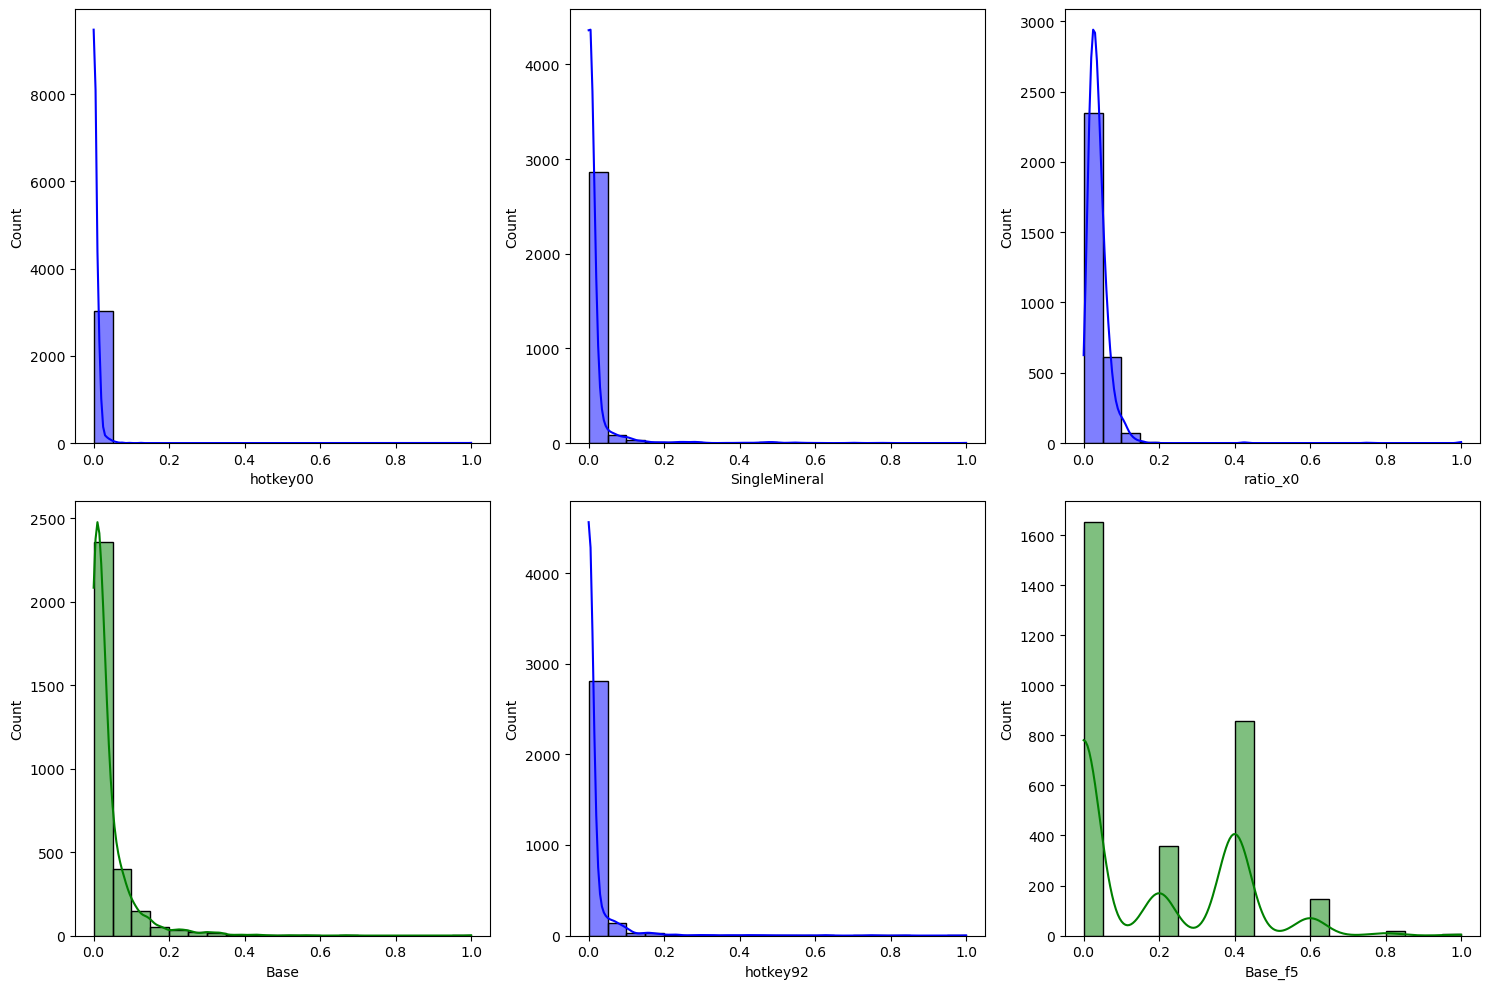

In [69]:
# Assuming you have already computed the variances and selected features
variances = X_normalized.var()
lowest = variances.nsmallest(6)

# Create subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(X_normalized['hotkey00'], bins=20, kde=True, color='blue', ax=axes[0, 0])
sns.histplot(X_normalized['SingleMineral'], bins=20, kde=True, color='blue', ax=axes[0, 1])
sns.histplot(X_normalized['ratio_x0'], bins=20, kde=True, color='blue', ax=axes[0, 2])
sns.histplot(X_normalized['Base'], bins=20, kde=True, color='green', ax=axes[1, 0])
sns.histplot(X_normalized['hotkey92'], bins=20, kde=True, color='blue', ax=axes[1, 1])
sns.histplot(X_normalized['Base_f5'], bins=20, kde=True, color='green', ax=axes[1, 2])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

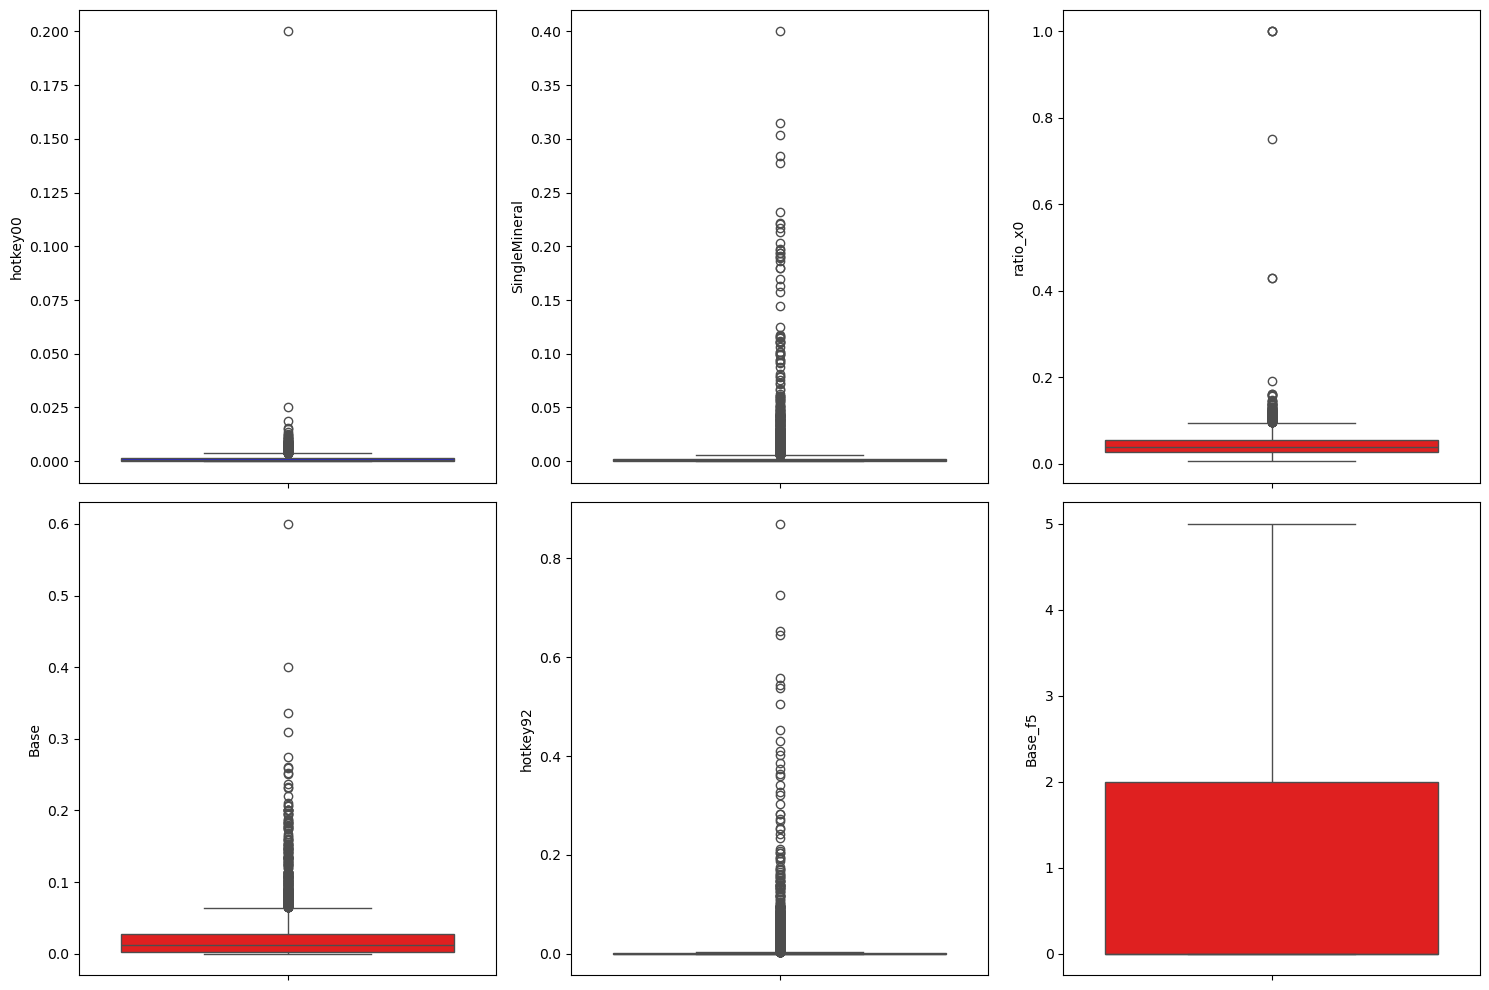

In [68]:
# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot first boxplot
sns.boxplot(y=features['hotkey00'], color='blue', ax=axes[0,0])
sns.boxplot(y=features['SingleMineral'], color='red', ax=axes[0,1])
sns.boxplot(y=features['ratio_x0'], color='red', ax=axes[0,2])
sns.boxplot(y=features['Base'], color='red', ax=axes[1,0])
sns.boxplot(y=features['hotkey92'], color='red', ax=axes[1,1])
sns.boxplot(y=features['Base_f5'], color='red', ax=axes[1,2])

plt.tight_layout()
plt.show()

### Remove highly correlated features

In [7]:
#create correlation matrix and remove features with correlation higher than 0.85
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
X_selected = X.drop(columns=to_drop)

In [8]:
corr_matrix

,ratio_s,ratio_base,ratio_mineral,action_per_5_seconds,ratio_x0,ratio_x1,ratio_x2,Base,SingleMineral,hotkey00,...,hotkey52_f5,hotkey42_f5,hotkey22_f5,hotkey92_f5,hotkey02_f5,hotkey82_f5,hotkey72_f5,played_race_Protoss,played_race_Terran,played_race_Zerg
ratio_s,1.000000,0.162869,0.015895,0.152310,0.112610,0.393104,0.022008,0.040272,0.055980,0.064278,...,0.011555,0.004714,0.019420,0.035297,0.032423,0.023507,0.006855,0.462766,0.091889,0.559613
ratio_base,0.162869,1.000000,0.088050,0.040380,0.023929,0.057343,0.042934,0.820804,0.090185,0.001476,...,0.024646,0.047926,0.014175,0.016304,0.030677,0.026790,0.006875,0.306462,0.384423,0.037267
ratio_mineral,0.015895,0.088050,1.000000,0.086124,0.020461,0.101852,0.054563,0.092332,0.892943,0.005268,...,0.035355,0.013439,0.075501,0.069845,0.073342,0.033143,0.004976,0.037542,0.166605,0.114037
action_per_5_seconds,0.152310,0.040380,0.086124,1.000000,0.325873,0.083085,0.348850,0.012583,0.117081,0.030472,...,0.022267,0.052773,0.078633,0.025105,0.009659,0.016782,0.023028,0.235128,0.015761,0.256006
ratio_x0,0.112610,0.023929,0.020461,0.325873,1.000000,0.124966,0.942107,0.277957,0.017431,0.386968,...,0.002057,0.013442,0.035910,0.001946,0.004327,0.006382,0.007779,0.072136,0.008479,0.081879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hotkey82_f5,0.023507,0.026790,0.033143,0.016782,0.006382,0.010730,0.002656,0.011159,0.015916,0.006016,...,0.003719,0.004957,0.005619,0.001347,0.001265,1.000000,0.000329,0.014704,0.010622,0.024837
hotkey72_f5,0.006855,0.006875,0.004976,0.023028,0.007779,0.032464,0.003315,0.007320,0.004497,0.005058,...,0.003719,0.004957,0.005619,0.001347,0.001265,0.000329,1.000000,0.022349,0.010622,0.013231
played_race_Protoss,0.462766,0.306462,0.037542,0.235128,0.072136,0.264238,0.018296,0.284667,0.016906,0.022218,...,0.000009,0.006987,0.019291,0.056372,0.047328,0.014704,0.022349,1.000000,0.475288,0.592039
played_race_Terran,0.091889,0.384423,0.166605,0.015761,0.008479,0.264685,0.081107,0.366188,0.138338,0.044525,...,0.011960,0.032795,0.042255,0.018845,0.022611,0.010622,0.010622,0.475288,1.000000,0.427674


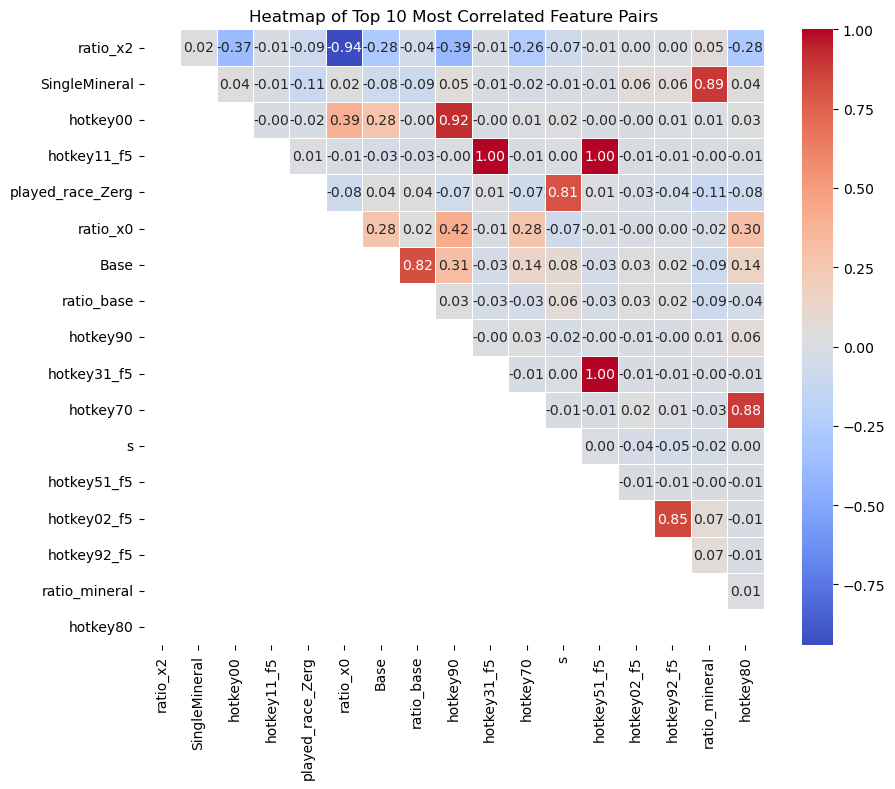

In [16]:
# Get the 10 highest correlation pairs
top_10_corr = upper.unstack().sort_values(ascending=False).dropna().head(10)

# Get unique features from the top 10 correlated pairs
top_features = set(top_10_corr.index.get_level_values(0)).union(set(top_10_corr.index.get_level_values(1)))

# Create new correlation matrix with only selected features
filtered_corr_matrix = X[list(top_features)].corr()

# Create a mask for the upper triangle
mask = np.tril(np.ones_like(filtered_corr_matrix, dtype=bool))

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title("Heatmap of Top 10 Most Correlated Feature Pairs")
plt.show()

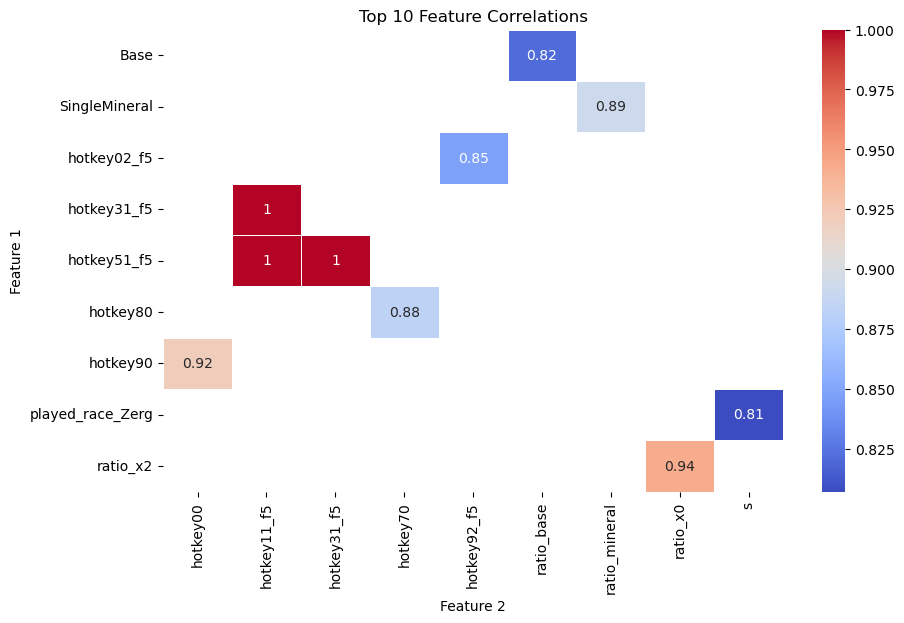

In [10]:
# Get the 10 highest correlations (excluding self-correlations)
top_10_corr = upper.unstack().sort_values(ascending=False).dropna().head(10)

# Convert to DataFrame for easy visualization
top_10_df = pd.DataFrame(top_10_corr).reset_index()
top_10_df.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Plot heatmap of top 10 correlations
plt.figure(figsize=(10, 6))
sns.heatmap(top_10_df.pivot(index='Feature 1', columns='Feature 2', values='Correlation'), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Top 10 Feature Correlations')
plt.show()

In [11]:
print(f"{len(to_drop)} columns removed")
print(f"removed columns: {to_drop}")

6 columns removed
removed columns: ['ratio_x2', 'SingleMineral', 'hotkey80', 'hotkey90', 'hotkey31_f5', 'hotkey51_f5']


In [12]:
#return filtered dataframe
features_filtered = features.drop(columns=set(removed_columns + to_drop))
features_filtered.shape

(3044, 47)

#### This creates the filtered file

In [13]:
#features_filtered.to_csv('features_filtered.csv', index=False)

#### Data exploration

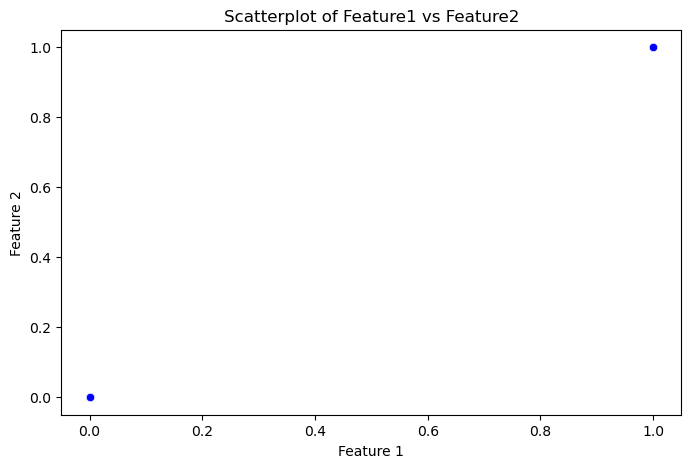

In [40]:
# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=features['hotkey11_f5'], y=features['hotkey31_f5'], color='blue')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatterplot of Feature1 vs Feature2')

plt.show()

In [30]:
zerg = features[features['played_race_Zerg']==True]
protoss = features[features['played_race_Protoss']==True]
terran = features[features['played_race_Terran']==True]

print(zerg['s'].mean())
print(protoss['s'].mean())
print(terran['s'].mean())

0.9798204890775766
0.46789712695312946
0.5870523423797581


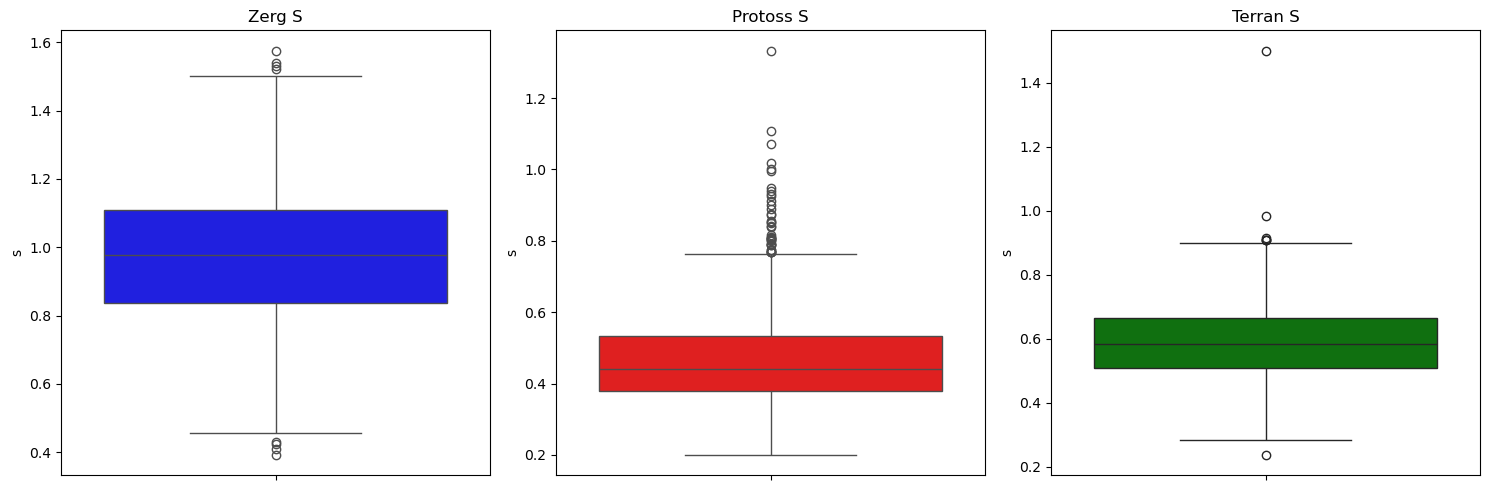

In [37]:
# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot first boxplot
sns.boxplot(y=zerg['s'], color='blue', ax=axes[0])
axes[0].set_title("Zerg S")

# Plot second boxplot
sns.boxplot(y=protoss['s'], color='red', ax=axes[1])
axes[1].set_title("Protoss S")

# Plot third boxplot
sns.boxplot(y=terran['s'], color='green', ax=axes[2])
axes[2].set_title("Terran S")

# Adjust layout
plt.tight_layout()
plt.show()

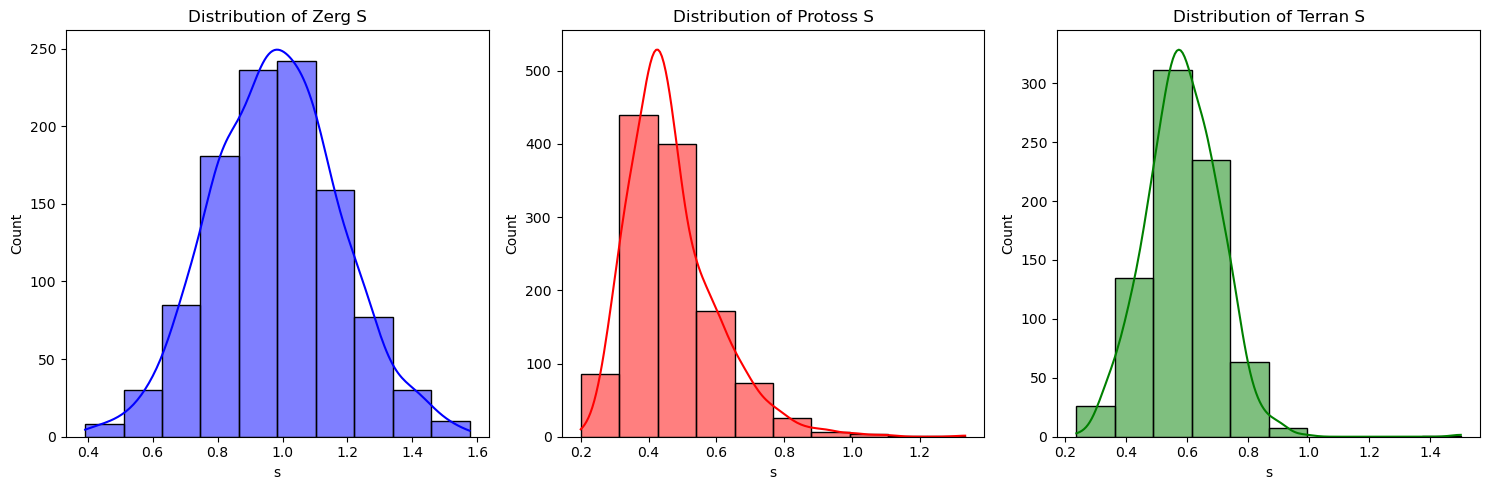

In [34]:
# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot first histogram
sns.histplot(zerg['s'], bins=10, kde=True, color='blue', ax=axes[0])
axes[0].set_title("Distribution of Zerg S")

# Plot second histogram
sns.histplot(protoss['s'], bins=10, kde=True, color='red', ax=axes[1])
axes[1].set_title("Distribution of Protoss S")

# Plot third histogram
sns.histplot(terran['s'], bins=10, kde=True, color='green', ax=axes[2])
axes[2].set_title("Distribution of Terran S")

# Adjust layout
plt.tight_layout()
plt.show()